# How to Wine recognition with MLP Classifier 
## (Sparse categorical Cross Entropy)

## Libraries import

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix, classification_report

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

## Load the wine dataset

In [4]:
data = load_wine()
X = data.data
y = data.target

## Standard scaling

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dataset split

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.2, shuffle=True, stratify=y)

## Convert target labels to one-hot encoded vectors

In [7]:
num_classes = 3
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)

## Building model

In [8]:
inputs = keras.Input(shape=(X.shape[1], ))
hidden_layers = keras.layers.Dense(6, activation="relu")(inputs)
output_layer = keras.layers.Dense(num_classes, activation="softmax")(hidden_layers)

In [9]:
classifier = keras.Model(inputs=inputs, outputs=output_layer)

In [10]:
classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 84        
                                                                 
 dense_3 (Dense)             (None, 3)                 21        
                                                                 
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


## Compile and fit model

In [11]:
classifier.compile(optimizer="adam", loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
history = classifier.fit(x=X_train, y=y_train_encoded, batch_size=10, epochs=100, validation_data=(X_val, y_val_encoded))

Epoch 1/100
15/15 [==============================] - 2s 29ms/step - loss: 1.5440 - accuracy: 0.2254 - val_loss: 1.3372 - val_accuracy: 0.2222
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 1.3837 - accuracy: 0.2746 - val_loss: 1.2038 - val_accuracy: 0.2500
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 1.2416 - accuracy: 0.2958 - val_loss: 1.0845 - val_accuracy: 0.4444
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 1.1144 - accuracy: 0.4085 - val_loss: 0.9917 - val_accuracy: 0.6111
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.0089 - accuracy: 0.5352 - val_loss: 0.9067 - val_accuracy: 0.6389
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.9183 - accuracy: 0.6197 - val_loss: 0.8323 - val_accuracy: 0.7500
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.8412 - accuracy: 0.6972 - val_loss: 0.7741 - val_accuracy: 0.7778
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1075 - accuracy: 0.9930 - val_loss: 0.1883 - val_accuracy: 0.9167
Epoch 60/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1045 - accuracy: 0.9930 - val_loss: 0.1858 - val_accuracy: 0.9167
Epoch 61/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1017 - accuracy: 0.9930 - val_loss: 0.1840 - val_accuracy: 0.9167
Epoch 62/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9930 - val_loss: 0.1823 - val_accuracy: 0.9167
Epoch 63/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0963 - accuracy: 0.9930 - val_loss: 0.1810 - val_accuracy: 0.9167
Epoch 64/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0938 - accuracy: 0.9930 - val_loss: 0.1794 - val_accuracy: 0.9167
Epoch 65/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0914 - accuracy: 0.9930 - val_loss: 0.1781 - val_accuracy: 0.9167
Epoch 

## MLP Performance

In [12]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = history.epoch, y = history.history['loss'], name ="Train loss"))

fig.add_trace(go.Scatter(x = history.epoch, y = history.history['val_loss'], name ="Validation Loss"))

fig.update_layout(
    title = "MLP performance in accuracy",
    xaxis_title = "Epochs",
    yaxis_title = "Loss")

fig.show()

## Validation test predictions

In [13]:
y_pred = classifier.predict(X_val)

2/2 [==============================] - 0s 0s/step


In [14]:
y_pred[0]

array([0.978445  , 0.01847063, 0.00308438], dtype=float32)

### From probabilities to classes...

In [15]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

array([0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1], dtype=int64)

## Classification report

In [16]:
print(classification_report(y_val, y_pred_labels))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.79      0.88        14
           2       0.83      1.00      0.91        10

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.91        36



## Confusion matrix

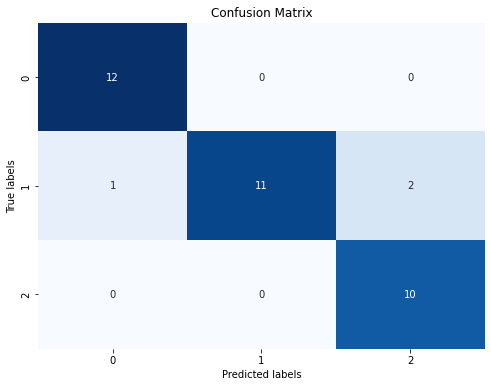

In [17]:
cm = confusion_matrix(y_val, y_pred_labels)

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()